In [3]:
import numpy as np
import vaex as vx
import pylab
ds = vx.open("/home/data/gavi/Aq-A-2-999-shuffled-10percent.hdf5")
print ds
#server = vx.server("localhost")
#ds = server.open("../data/Aq-A-2-999-shuffled-1percent.hdf5")
%matplotlib inline
table

Simplest example
------------------
The default for plot is to calculate the mean +/- 3 sigma for the limits, and plot the density plot

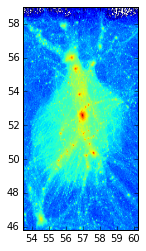

In [4]:
subspace = ds("x", "y")
subspace.plot(f=np.log)

More control
------------------
For more control, you can find the limits yourself, with minmax or limits_sigma, do the histogram, and let vaex handle the plotting.

Vaex uses matplotlib, so any matplotlib routines before and afterwards are fine.

In [5]:
limits = subspace.limits_sigma(square=True, sigmas=0.4)
means = subspace.mean()
print "limits", limits

limits [[ 56.19850387  57.53320609]
 [ 51.74976341  53.08446563]]


In [6]:
grid = subspace.histogram(size=256, limits=limits)

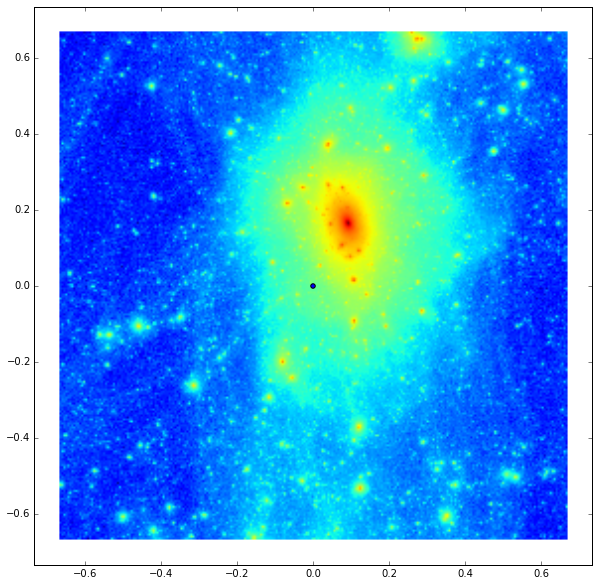

In [7]:
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(np.log10(grid+1), limits, center=means)
pylab.scatter(0, 0)

More control
------------------
Extra keywords will be passed to pylab.imshow, such as cmap for the colormap

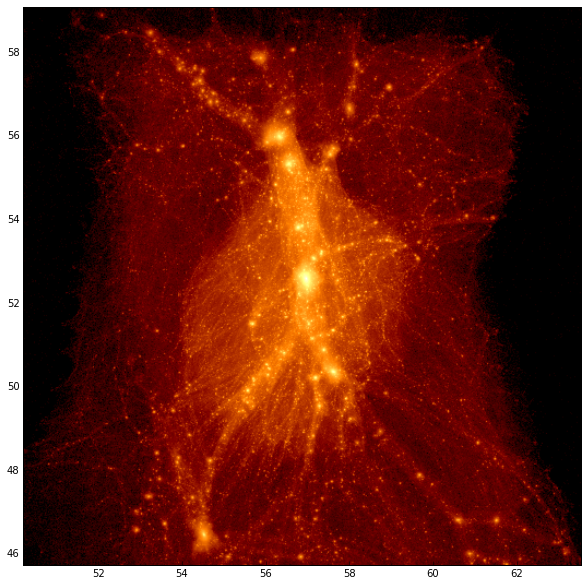

In [8]:
limits = subspace.limits_sigma(sigmas=4, square=True)
grid = subspace.histogram(size=512, limits=limits)
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(grid, limits=limits, f=np.log1p, cmap='afmhot')

In [9]:
#reload_ext autoreload
%load_ext autoreload
%autoreload 2


Selections
------------------
Selections can be done using expressions as well. To use the selection, use subspace.selected()

In [10]:
ds.select("(z<48)")
selected = subspace.selected()
grid_masked1 = selected.histogram(size=512, limits=limits)
ds.select("(z>50)")
grid_masked2 = selected.histogram(size=512, limits=limits)


<matplotlib.contour.QuadContourSet instance at 0x2b17c421fb48>

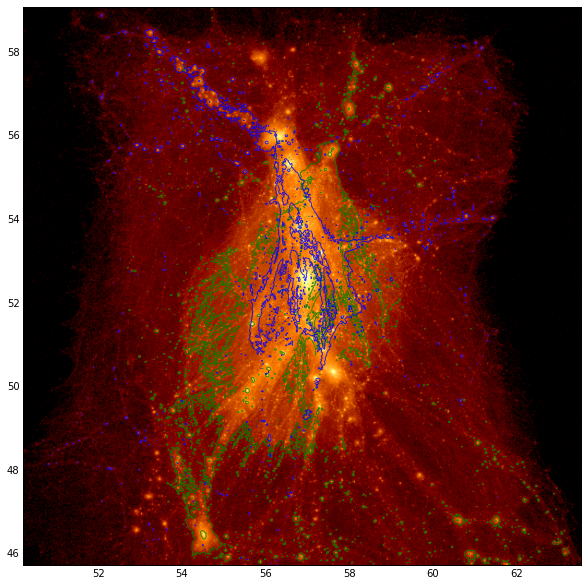

In [11]:
cmap = 'afmhot'
pylab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
subspace.plot(np.log(grid+1), limits=limits, cmap=cmap, alpha=1.0)
#subspace.plot(np.log(grid_masked), limits=limits, cmap=cmap, alpha=0.5)
pylab.contour(np.log(grid_masked1), 2, extent=np.array(limits).flatten(), alpha=0.8, colors="green")
pylab.contour(np.log(grid_masked2), 2, linewidth="2pt", colors="blue", extent=np.array(limits).flatten(), alpha=0.8)

In [12]:
subspace = ds("x", "y")

In [13]:
subspace.mean()

array([ 56.86554467,  52.41758988])

In [2]:
ls

example_1.ipynb       Untitled1.ipynb  Untitled5.ipynb  volume rendering.ipynb
example_server.ipynb  Untitled2.ipynb  Untitled6.ipynb
gums_mass.ipynb       Untitled3.ipynb  Untitled.ipynb
tutorial.ipynb        Untitled4.ipynb  vaexclient.py
